# Anchored CorEx: Topic Modeling with Minimal Domain Knowledge

In [1]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt

from corextopic import corextopic as ct
from corextopic import vis_topic# jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

import pandas as pd
from sklearn.feature_extraction import text


In [69]:
data = pd.read_csv('../Data/RYANDATA_filt_even.csv')
data.columns = ['topic', 'V0','topic_split','topic1','authors','title','journal','year','vol_issue','doi','abstract']
print(data.groupby('topic')['title'].nunique())
data['abstract'] = data['abstract'].fillna('').astype(str) #replace nan with space so we can still vectorize
data['everything'] = data['title'] + ' ' + data['abstract']


topic
BONE                              500
CARDIOVASCULAR/CARDIOPULMONARY    498
CELLULAR/SUBCELLULAR              499
COMPARATIVE                       497
DENTAL/ORAL/FACIAL                499
ERGONOMICS                        498
ERGONOMICS/REHABILITATION         499
EVOLUTION/ANTHROPOLOGY            497
GAIT/LOCOMOTION                   500
HAND/FINGER/FOOT/TOE              500
JOINT/CARTILAGE                   499
METHODS                           498
MODELING                          500
MUSCLE                            496
NEURAL                            498
ORTHOPAEDICS/SPINE                500
ORTHOPAEDICS/SURGERY              500
POSTURE/BALANCE                   496
PROSTHETICS/ORTHOTICS             497
REHABILITATION                    499
ROBOTICS                          500
SPORT/EXERCISE                    499
TENDON/LIGAMENT                   500
TISSUE/BIOMATERIAL                500
TRAUMA/IMPACTTESTING              498
VETERINARY/AGRICULTURAL           496
VISUAL

In [71]:
#split data keeping distribution
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits= 1, 
                             test_size = 0.2, 
                             random_state = 0)

for train_idx, test_idx in sss.split(data['title'],data['topic']):
    X_train, X_test = data['everything'][train_idx], data['everything'][test_idx]
    y_train, y_test = data['topic'][train_idx], data['topic'][test_idx]


y_train.value_counts() #same distribution as original data

SPORT/EXERCISE                    400
NEURAL                            400
TRAUMA/IMPACTTESTING              400
COMPARATIVE                       400
REHABILITATION                    400
CELLULAR/SUBCELLULAR              400
ORTHOPAEDICS/SPINE                400
MODELING                          400
VISUAL/VESTIBULAR/EYE             400
DENTAL/ORAL/FACIAL                400
POSTURE/BALANCE                   400
METHODS                           400
ROBOTICS                          400
CARDIOVASCULAR/CARDIOPULMONARY    400
TISSUE/BIOMATERIAL                400
VISUAL/VESTIBULAR                 400
JOINT/CARTILAGE                   400
ERGONOMICS                        400
MUSCLE                            400
BONE                              400
HAND/FINGER/FOOT/TOE              400
TENDON/LIGAMENT                   400
VETERINARY/AGRICULTURAL           400
ORTHOPAEDICS/SURGERY              400
GAIT/LOCOMOTION                   400
PROSTHETICS/ORTHOTICS             400
ERGONOMICS/R

In [73]:
#https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
# from nltk.stem.porter import *
import numpy as np
np.random.seed(0)

# import nltk
# nltk.download('wordnet')

#tokenize, lemmatized, stemmed
stemmer = SnowballStemmer(language='english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
#             result.append(lemmatize_stemming(token))
            result.append(token)
    result = ' '.join(result)        
    return result

doc_sample = X_train[0]
print('Original document: ')
words = []
for doc in [doc_sample]:
    print(doc)
print('\nTokenized and lemmatized document: ')
print(preprocess(doc_sample),'\n')

X_train_proc = X_train.map(preprocess)

train_data = pd.DataFrame({'title':X_train_proc, 'topic':y_train})
train_data
                      
          
         

Original document: 
 Assessment of bone tissue mineralization by conventional x-ray microcomputed tomography: Comparison with synchrotron radiation microcomputed tomography and ash measurements Assessment bone tissue mineral density TMD may provide information critical understanding mineralization processes bone biomechanics High resolution three dimensional assessment TMD recently demonstrated using synchrotron radiation microcomputed tomography SRmuCT however imaging modality relatively inaccessible due scarcity SR facilities Conventional desktop muCT systems widely available used extensively assess bone microarchitecture However polychromatic source cone shaped beam geometry complicate assessment TMD conventional muCT goal study evaluate muCT based measurement degree distribution tissue mineralization quantitative spatially resolved manner Specifically muCT measures bone mineral content BMC TMD compared obtained SRmuCT gravimetric methods Cylinders trabecular bone machined human fem

,title,topic
12659,bridle designed avoid peak pressure locations ...,VETERINARY/AGRICULTURAL
761,upper airway biomechanical coupling tissue hys...,CARDIOVASCULAR/CARDIOPULMONARY
316,evaluation risk secondary fracture removal fem...,BONE
9502,effects balance gait rehabilitation cerebellar...,REHABILITATION
5694,automatic tracking medial gastrocnemius fascic...,METHODS
11960,vitro biomechanical biocompatible evaluation n...,TISSUE/BIOMATERIAL
11433,knee frontal plane biomechanics adults bone ma...,TENDON/LIGAMENT
4987,prediction fingers posture artificial neural n...,HAND/FINGER/FOOT/TOE
83,systemic treatment strontium ranelate influenc...,BONE
3300,evolutionary constraints mitochondrial depend ...,ERGONOMICS/REHABILITATION


In [106]:
#transform title data into sparse matrix
#additional stop words
stop_words = text.ENGLISH_STOP_WORDS.union(['biomechanics','biomechanical','locomotor','locomotion','study',
                                           'results','compared','objective','significant','purpose',
                                           'significantly','increased','showed','different','conclusion',
                                           'measured','observed']) #remove abstract words
#CountVectorizer
vectorizer = CountVectorizer(min_df=3,
                            max_df=0.5,
                            max_features= 20000,
                            ngram_range=(1,3),
                            strip_accents='unicode',
                            lowercase=True,
                            analyzer='word',
                            stop_words=stop_words,
                            token_pattern= '[a-zA-Z-0-9]{3,}',
                           )
doc_word = vectorizer.fit_transform(train_data['title'])
doc_word = ss.csr_matrix(doc_word)
doc_word.shape # n_docs x m_words


(11200, 20000)

In [107]:
#get common words for each topic
n_top_topics = 3
title_subset = []
top_words = []
freq_list = []
words_freq = []
for i in train_data.groupby('topic'):
    title_subset.append(i)
for a in title_subset:  
    a # all titles in a given topic
    bag_of_words = vectorizer.transform(a[1]['title'])
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    words_freq = words_freq[:n_top_topics]
    for item in list(zip(*words_freq))[0]:
        freq_list.append(item)
#split list
freq_list = [freq_list[i:i + n_top_topics] for i in range(0, len(freq_list), n_top_topics)]

In [108]:
print(train_data.groupby('topic')['topic'].unique())
freq_list = freq_list
freq_list

topic
BONE                                                        [BONE]
CARDIOVASCULAR/CARDIOPULMONARY    [CARDIOVASCULAR/CARDIOPULMONARY]
CELLULAR/SUBCELLULAR                        [CELLULAR/SUBCELLULAR]
COMPARATIVE                                          [COMPARATIVE]
DENTAL/ORAL/FACIAL                            [DENTAL/ORAL/FACIAL]
ERGONOMICS                                            [ERGONOMICS]
ERGONOMICS/REHABILITATION              [ERGONOMICS/REHABILITATION]
EVOLUTION/ANTHROPOLOGY                    [EVOLUTION/ANTHROPOLOGY]
GAIT/LOCOMOTION                                  [GAIT/LOCOMOTION]
HAND/FINGER/FOOT/TOE                        [HAND/FINGER/FOOT/TOE]
JOINT/CARTILAGE                                  [JOINT/CARTILAGE]
METHODS                                                  [METHODS]
MODELING                                                [MODELING]
MUSCLE                                                    [MUSCLE]
NEURAL                                                  

[['bone', 'group', 'fracture'],
 ['aortic', 'wall', 'model'],
 ['cell', 'cells', 'mechanical'],
 ['body', 'performance', 'species'],
 ['implant', 'bone', 'stress'],
 ['work', 'risk', 'workers'],
 ['pain', 'training', 'patients'],
 ['evolution', 'species', 'morphology'],
 ['gait', 'walking', 'knee'],
 ['foot', 'joint', 'plantar'],
 ['cartilage', 'knee', 'joint'],
 ['method', 'based', 'analysis'],
 ['model', 'models', 'element'],
 ['muscle', 'muscles', 'force'],
 ['spinal', 'motor', 'cord'],
 ['spine', 'disc', 'cervical'],
 ['bone', 'fixation', 'group'],
 ['balance', 'postural', 'control'],
 ['knee', 'foot', 'ankle'],
 ['training', 'gait', 'patients'],
 ['robot', 'control', 'robots'],
 ['knee', 'performance', 'lower'],
 ['tendon', 'ligament', 'reconstruction'],
 ['tissue', 'properties', 'mechanical'],
 ['injury', 'impact', 'head'],
 ['cows', 'lameness', 'horses'],
 ['corneal', 'eyes', 'patients'],
 ['corneal', 'eyes', 'patients']]

In [109]:
anchor_list = pd.DataFrame({'top_words':freq_list})
anchor_list.iloc[0]['top_words'] #will use this to anchor model later. 
len(anchor_list)

28

In [110]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))
len(words)

20000

## CorEx Topic Model

The main parameters of the CorEx topic model are:
+ **`n_hidden`**: number of topics ("hidden" as in "hidden latent topics")
+ **`words`**: words that label the columns of the doc-word matrix (optional)
+ **`docs`**: document labels that label the rows of the doc-word matrix (optional)
+ **`max_iter`**: number of iterations to run through the update equations (optional, defaults to 200)
+ **`verbose`**:  if `verbose=1`, then CorEx will print the topic TCs with each iteration
+ **`seed`**:     random number seed to use for model initialization (optional)

We'll train a topic model with 50 topics. (This will take a few minutes.)

In [111]:
# Train the CorEx topic model with 24 topics
n_topics = len(anchor_list)
topic_model = ct.Corex(n_hidden=n_topics, 
                       words=words, 
                       max_iter=100, 
                       verbose=False, 
                       seed=1, 
                       docs = train_data['title'])
topic_model.fit(doc_word, words=words,);
print('model fit with',n_topics,'topics')

model fit with 28 topics


## CorEx Output

In [112]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=0, n_words=10)

[('performed', 0.07949368572040576),
 ('higher', 0.06963886832127972),
 ('differences', 0.06422550743726488),
 ('mean', 0.05893196855198663),
 ('time', 0.05826994113527847),
 ('lower', 0.056563975692607724),
 ('determine', 0.05339182581798088),
 ('changes', 0.05209127707645557),
 ('respectively', 0.051795402462582206),
 ('suggest', 0.05173782538129215)]

The topic words are those with the highest *mutual information* with the topic, rather than those with highest probability within the topic as in LDA. The mutual information with the topic is the number reported in each tuple. Theoretically, mutual information is always positive. If the CorEx output returns a negative mutual information from **`get_topics()`**, then the absolute value of that quantity is the mutual information between the topic and the *absence* of that word.

If the column labels have not been specified through **`words`**, then the code will return the column indices for the top words in each topic.

We can also retrieve all of the topics at once if we would like.

In [113]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: performed,higher,differences,mean,time,lower,determine,changes,respectively,suggest
1: cells,cell,expression,collagen,protein,microscopy,matrix,rats,cellular,extracellular
2: corneal,eyes,intraocular,intraocular pressure,corneal thickness,ocular,central corneal,central corneal thickness,ocular response,corneal hysteresis
3: muscle,gait,walking,muscles,limb,stance,ground,treadmill,ground reaction,training
4: bone,fracture,implant,fixation,implants,screw,fractures,mineral,screws,bone mineral
5: finite element,finite,element,model,models,element analysis,finite element analysis,element model,finite element model,stress
6: patients,years,measures,outcome,regression,included,follow,outcome measures,score,prospective
7: failure,cadaveric,surgical,testing,specimens,repair,load,tendon,fresh,tensile
8: flexion,joint,knee,motion,kinematics,extension,rotation,plane,lateral,moment
9: tissue,properties,mechanical,mechanical properties,modulus,tissues,strain,material,elastic,soft
10: understandin

The first topic for the newsgroup data tends to be less coherent than expected because of encodings and other oddities in the newsgroups data.  

We can also get the column indices instead of the column labels if necessary.

In [114]:
topic_model.get_topics(topic=5, n_words=10, print_words=False)

[(6342, 0.22322506097076067),
 (6341, 0.21713171217731508),
 (5274, 0.21195545040087851),
 (11499, 0.08921241031592562),
 (11581, 0.07762797522593866),
 (5276, 0.07596998072273131),
 (6344, 0.075688324032134),
 (5282, 0.05923274541489985),
 (6349, 0.058128440630428296),
 (17305, 0.05231346202758265)]

If we need to directly access the topic assignments for each word, they can be accessed through **`cluster`**.

In [115]:
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words

[17 16  5 ... 15  7  5]
(20000,)


### Document Labels

As with the topic words, the most probable documents per topic can also be easily accessed. Documents are sorted according to log probabilities which is why the highest probability documents have a score of 0 ($e^0 = 1$) and other documents have negative scores (for example, $e^{-0.5} \approx 0.6$).

In [116]:
# Print a single topic from CorEx topic model
topic_n = 0
indx = topic_model.get_top_docs(topic=topic_n, n_docs=10, sort_by='log_prob')
print("\nPapers for topic",topic_n)
for i in indx:
    print(i[0],train_data['title'].iloc[i[0]],'\n')

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices

Papers for topic 0
5599 integration geometric morphometrics computational biomechanics methods virtual reconstruction quantitative analysis finite element models ability warp dimensional meshes known biological morphology known predicted hypothetical morphologies range potential applications functional morphology biomechanics challenging applications finite element analysis potentially powerful destructive tool prediction mechanical behaviour geometric morphometrics typically based approach commonly applied morphological studies allows shape differences specimens quantified analysed integration fields recent years number shape warping approaches developed previously easily accessible present easily accessed method warping meshes based freely available software test effectiveness approach varanoid lizard mandible model present statistical approaches strain frequency plots landmark point strains analyse resul

CorEx is a *discriminative* model, whereas LDA is a *generative* model. This means that while LDA outputs a probability distribution over each document, CorEx instead estimates the probability a document belongs to a topic given that document's words. As a result, the probabilities across topics for a given document do not have to add up to 1. The estimated probabilities of topics for each document can be accessed through **`log_p_y_given_x`** or **`p_y_given_x`**.

In [117]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(11200, 28)


We can also use a softmax to make a binary determination of which documents belong to each topic. These softmax labels can be accessed through **`labels`**.

In [118]:
print(topic_model.labels.shape) # n_docs x k_topics

(11200, 28)


In [119]:
corex_pred_data = pd.DataFrame(topic_model.p_y_given_x)


Since CorEx does not prescribe a probability distribution of topics over each document, this means that a document could possibly belong to no topics (all 0's across topics in **`labels`**) or all topics (all 1's across topics in **`labels`**).

## Total Correlation and Model Selection

### Overall TC

Total correlation is the measure which CorEx maximize when constructing the topic model. It can be accessed through **`tc`** and is reported in nats.

In [120]:
print(topic_model.tc)


44.918791175113064


**Model selection:** CorEx starts its algorithm with a random initialization, and so different runs can result in different topic models. One way of finding a better topic model is to restart the CorEx algorithm several times and take the run that has the highest TC value (i.e. the run that produces topics that are most informative about the documents).

### Topic TC

The overall total correlation is the sum of the total correlation per each topic. These can be accessed through **`tcs`**. For an unsupervised CorEx topic model, the topics are always sorted from high to low according to their TC. For an anchored CorEx topic model, the topics are not sorted, and are outputted such that the anchored topics come first.

In [121]:
topic_model.tcs.shape# k_topics

(28,)

In [122]:
print(np.sum(topic_model.tcs))
print(topic_model.tc)

44.918791175113064
44.918791175113064


**Selecting number of topics:** one way to choose the number of topics is to observe the distribution of TCs for each topic to see how much each additional topic contributes to the overall TC. We should keep adding topics until additional topics do not significantly contribute to the overall TC. This is similar to choosing a cutoff eigenvalue when doing topic modeling via LSA.

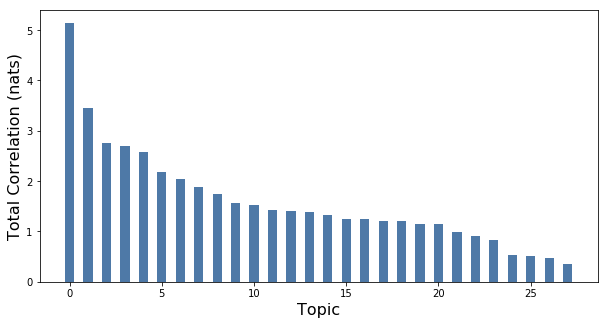

In [123]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

We see the first topic is much more informative than the other topics. Given that we suspect that this topic is picking up on image encodings (as given by "dsl" and "n3jxp" in the topic) and other boilerplate text (as given by the high TC and lack of coherence of the rest of the topic), we could consider doing additional investigation and preprocessing to help ensure that the CorEx topic model does not pick up on these patterns which are not insightful.

### Pointwise Document TC

We can decompose total correlation further. The topic correlation is the average of the pointwise total correlations for each individual document. The pointwise total correlations can be accessed through **`log_z`**.

In [124]:
topic_model.log_z.shape # n_docs x k_topics

(11200, 28)

In [125]:
print(np.mean(topic_model.log_z, axis=0))
print(topic_model.tcs)

[5.14114207 3.45627605 2.76069105 2.70451875 2.56963531 2.17748864
 2.0462515  1.88162941 1.74519723 1.56425414 1.53320808 1.41709658
 1.40250657 1.39438891 1.32812679 1.24667627 1.24215161 1.2107167
 1.20351794 1.15500027 1.14917477 0.98665287 0.9004494  0.83518921
 0.52607586 0.51288365 0.47835928 0.34953228]
[5.14114207 3.45627605 2.76069105 2.70451875 2.56963531 2.17748864
 2.0462515  1.88162941 1.74519723 1.56425414 1.53320808 1.41709658
 1.40250657 1.39438891 1.32812679 1.24667627 1.24215161 1.2107167
 1.20351794 1.15500027 1.14917477 0.98665287 0.9004494  0.83518921
 0.52607586 0.51288365 0.47835928 0.34953228]


The pointwise total correlations in **`log_z`** represent the correlations within an individual document explained by a particular topic. These correlations have been used to measure how "surprising" documents are with respect to given topics (see references below).

## Hierarchical Topic Models

The **`labels`** attribute gives the binary topic expressions for each document and each topic. We can use this output as input to another CorEx topic model to get latent representations of the topics themselves. This yields a hierarchical CorEx topic model. Like the first layer of the topic model, one can determine the number of latent variables to add in higher layers through examination of the topic TCs.

In [ ]:
# # Train a second layer to the topic model
# tm_layer2 = ct.Corex(n_hidden=10)
# tm_layer2.fit(topic_model.labels);

# # Train a third layer to the topic model
# tm_layer3 = ct.Corex(n_hidden=1)
# tm_layer3.fit(tm_layer2.labels);

If you have `graphviz` installed, then you can output visualizations of the hierarchial topic model to your current working directory. One can also create custom visualizations of the hierarchy by properly making use of the **`labels`** attribute of each layer.

In [ ]:
# # no unicode??
# vis_hierarchy([topic_model, tm_layer2, tm_layer3], column_label=words, max_edges=200, prefix='topic-model-example')

# from graphviz import Source
# path = 'topic-model-example/graphs/graph_prune_200.dot'
# s = Source.from_file(path)
# s.view()

## Anchoring for Semi-Supervised Topic Modeling

Anchored CorEx is an extension of CorEx that allows the "anchoring" of words to topics. When anchoring a word to a topic, CorEx is trying to maximize the mutual information between that word and the anchored topic. So, anchoring provides a way to guide the topic model towards specific subsets of words that the user would like to explore.  

The anchoring mechanism is flexible, and so there are many possibilities of anchoring. We explored the following types of anchoring in our TACL paper:

1. Anchoring a single set of words to a single topic. This can help promote a topic that did not naturally emerge when running an unsupervised instance of the CorEx topic model. For example, one might anchor words like "snow," "cold," and "avalanche" to a topic if one suspects there should be a snow avalanche topic within a set of disaster relief articles.

2. Anchoring single sets of words to multiple topics. This can help find different aspects of a topic that may be discussed in several different contexts. For example, one might anchor "protest" to three topics and "riot" to three other topics to understand different framings that arise from tweets about political protests.

3. Anchoring different sets of words to multiple topics. This can help enforce topic separability if there appear to be chimera topics. For example, one might anchor "mountain," "Bernese," and "dog" to one topic and "mountain," "rocky," and "colorado" to another topic to help separate topics that merge discussion of Bernese Mountain Dogs and the Rocky Mountains.


We'll demonstrate how to anchor words to the the CorEx topic model and how to develop other anchoring strategies.

In [126]:
anchor_list_list = anchor_list.to_dict('list')
# anchor_list.iloc[0]['top_words']
anchor_words = anchor_list['top_words']
# Anchor one word to the first topic
anchor_words


0                [bone, group, fracture]
1                  [aortic, wall, model]
2              [cell, cells, mechanical]
3           [body, performance, species]
4                [implant, bone, stress]
5                  [work, risk, workers]
6             [pain, training, patients]
7       [evolution, species, morphology]
8                  [gait, walking, knee]
9                 [foot, joint, plantar]
10              [cartilage, knee, joint]
11             [method, based, analysis]
12              [model, models, element]
13              [muscle, muscles, force]
14                 [spinal, motor, cord]
15               [spine, disc, cervical]
16               [bone, fixation, group]
17          [balance, postural, control]
18                   [knee, foot, ankle]
19            [training, gait, patients]
20              [robot, control, robots]
21            [knee, performance, lower]
22    [tendon, ligament, reconstruction]
23      [tissue, properties, mechanical]
24              

In [127]:

anchored_topic_model = ct.Corex(n_hidden=n_topics, seed=2) 
anchored_topic_model.fit(doc_word, 
                         words=words, 
                         anchors=anchor_words, 
                         anchor_strength=5);
print('anchored model fit')

anchored model fit


New topic: group,bone,fracture
[2.434 2.607 4.234 2.127 4.231 2.306 2.812 2.516 3.134 2.156 2.615 2.581
 3.409 3.491 3.328 2.015 2.506 2.149 3.049 2.112 2.099 2.13  3.085 3.23
 2.479 9.496 3.755 2.124]
84.20782541239033


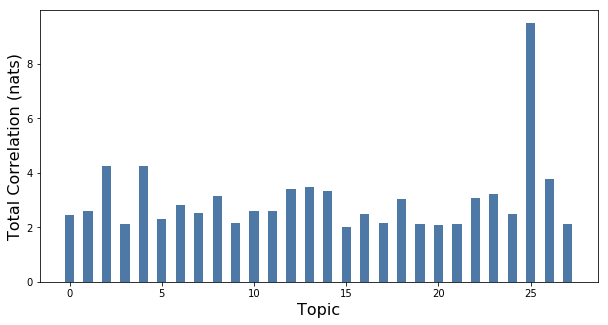

In [128]:
topic_words,_ = zip(*anchored_topic_model.get_topics(topic=0))
print('New topic: ' + ','.join(topic_words[0:3]))
print(np.round(anchored_topic_model.tcs,3))
plt.figure(figsize=(10,5))
plt.bar(range(anchored_topic_model.tcs.shape[0]), anchored_topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);
print(anchored_topic_model.tc)

In [129]:
from sklearn.externals import joblib
joblib.dump(anchored_topic_model, '../Models/LDA/anchored_topic_model.pkl')
joblib.dump(vectorizer, '../Models/LDA/anchored_topic_vectorizer.pkl')

print ("Model/Vectorizer Saved")

Model/Vectorizer Saved


We can anchor multiple groups of words to multiple topics as well.

In [131]:
n_docs = 1
topic_titles = ['' for x in range(n_topics)]
topic_names = ['' for x in range(n_topics)]
topic_list = train_data.groupby('topic')['topic'].unique().index
topic_model_top_papers = pd.DataFrame([])

for topic_n in range(n_topics):
    new_titles = []
    topic_name = []
    indx = anchored_topic_model.get_top_docs(topic=topic_n, n_docs=n_docs, sort_by='log_prob')
    for item in list(zip(*indx))[0]:
        new_titles.append(train_data['title'].iloc[item])
        topic_name.append(topic_list[topic_n])
        temp_df = pd.DataFrame({'title':new_titles, 'topic':topic_name})
#         print(item)    
#     print("\nPapers for topic",topic_n)
#     for i in indx:
#         new_titles.append(train_data['title'].iloc[i[0]])
    print(topic_n)
    topic_titles[topic_n] = new_titles
    topic_names[topic_n] = topic_name
    if topic == 0:
        topic_model_top_papers = topic_model_top_papers.append(temp_df, ignore_index=True)
    else:
        topic_model_top_papers = topic_model_top_papers.append(temp_df, ignore_index=True)
#     topic_model_top_papers.append(temp_df, ignore_index = True)

#split list
# topic_titles = [topic_titles[i:i + n_docs] for i in range(0, len(topic_titles), n_docs)]
# topic_model_top_papers = pd.DataFrame({'title':topic_titles, 'topic':topic_names})
# topic_model_top_papers = topic_model_top_papers.transpose()
temp_df

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
0
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
1
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
2
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
3
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
4
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
5
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
6
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
7
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
8
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
9
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
10
NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
11
NOTE: 'docs' not provided 

,title,topic
0,enhanced closed kinematic chain biomechanical therapy patients total knee arthroplasty factors contribute suboptimal results total knee arthroplasty little known value postsurgical rehabilitation examined effects enhanced closed kinematic chain exercises program apostherapy gait patterns clinical outcomes patients lack progress postsurgical rehabilitation patients prospectively followed study gait spatiotemporal parameters measured initial evaluation minutes therapy months therapy western ontario mcmaster universities osteoarthritis index womac short form health survey completed patients treatment months treatment womac scores improved significantly months treatment gait velocity single limb support step length operated improved significantly single minutes treatment normal gait velocity observed patients months treatment physiotherapy program included enhanced closed kinematic chain biomechanical therapy beneficial patients experienced suboptimal rehabilitation course,VISUAL/VESTIBULAR/EYE


In [132]:
pd.set_option('max_colwidth',-1)
topic_model_top_papers #i don't think this is totally right.

,title,topic
0,bone implant interface upregulates osteoclast activation pathways peri implant bone resorption total joint arthroplasty parameter aseptic loosening implant wear debris biomechanical aspects demonstrated bone resorption process parameters clearly identified primary initiator peri implant bone resorption biomechanical parameters micromotions measured bone implant interface normal gait cycles amplitude micromotions shown trigger differentiation bone tissues data exists directly quantifying effect micromotion compression human bone hypothesize micromotion compression bone implant interface induce direct activation bone resorption implant osteoblasts osteoclasts cell signaling human bone hypothesis tested vivo loading developed stimulate trabecular bone cores mimic micromotions arising bone implant interface gene expression rankl tgfb ifng analyzed mechanical stimulation control exposure compression exposure micromotions observed fold upregulation rankl exposure micromotions downregulation ifng tgfb rankl ratio upregulated fold micromotions suggests micromotions arising bone implant interface normal gait cycles induce bone resorption response occurs wear debris particles enter,BONE
1,integration geometric morphometrics computational biomechanics methods virtual reconstruction quantitative analysis finite element models ability warp dimensional meshes known biological morphology known predicted hypothetical morphologies range potential applications functional morphology biomechanics challenging applications finite element analysis potentially powerful destructive tool prediction mechanical behaviour geometric morphometrics typically based approach commonly applied morphological studies allows shape differences specimens quantified analysed integration fields recent years number shape warping approaches developed previously easily accessible present easily accessed method warping meshes based freely available software test effectiveness approach varanoid lizard mandible model present statistical approaches strain frequency plots landmark point strains analyse results quantitatively integrate geometric morphometrics strain frequency plots strain field bending displacements landmark point strain data demonstrate mechanical behaviour warped specimens reproduces targets significant error influence including internal cavity morphology models examined shown increase bending displacements strain magnitudes models warping approaches presented useful range applications including generation analysis virtual reconstructions generic models approximate species means hypothetical morphologies evolutionary intermediaries,CARDIOVASCULAR/CARDIOPULMONARY
2,integration geometric morphometrics computational biomechanics methods virtual reconstruction quantitative analysis finite element models ability warp dimensional meshes known biological morphology known predicted hypothetical morphologies range potential applications functional morphology biomechanics challenging applications finite element analysis potentially powerful destructive tool prediction mechanical behaviour geometric morphometrics typically based approach commonly applied morphological studies allows shape differences specimens quantified analysed integration fields recent years number shape warping approaches developed previously easily accessible present easily accessed method warping meshes based freely available software test effectiveness approach varanoid lizard mandible model present statistical approaches strain frequency plots landmark point strains analyse results quantitatively integrate geometric morphometrics strain frequency plots strain field bending displacements landmark point strain data demonstrate mechanical behaviour warped specimens reproduces targets significant error influence including internal cavity morphology models examined shown increase bending displacements strain magnitudes models warping approaches presented useful range applications inclu

In [205]:
tops = train_data.groupby('topic')['topic'].unique().index
tops.name = None
topic_model_top_papers.columns = tops
topic_model_top_papers

,BONE,CARDIOVASCULAR/CARDIOPULMONARY,CELLULAR/SUBCELLULAR,COMPARATIVE,DENTAL/ORAL/FACIAL,ERGONOMICS,EVOLUTION/ANTHROPOLOGY,GAIT/LOCOMOTION,JOINT/CARTILAGE,METHODS,...,ORTHOPAEDICS/SURGERY,PROSTHETICS/ORTHOTICS,REHABILITATION,ROBOTICS,SPORT/EXERCISE,TENDON/LIGAMENT,TISSUE/BIOMATERIAL,TRAUMA/IMPACTTESTING,VETERINARY/AGRICULTURAL,VISUAL/VESTIBULAR/EYE
0,effect static bone strain implant stability bo...,layer region specific material ascending thora...,bone marrow derived mesenchymal stem cells obt...,elastic ankle muscle tendon interactions adjus...,implant material design alter construct stiffn...,computational model effects intraluminal throm...,morphology humeral insertion supraspinatus inf...,overcoming limitations harmonic ratio reliable...,coronal oblique imaging knee increase radiolog...,identification stair climbing ability levels c...,...,comparison multiple linear regression artifici...,muscle force distribution lower limbs walking ...,overcoming limitations harmonic ratio reliable...,multicontact locomotion transfemoral prosthese...,effects functional electrical stimulation gait...,contribution antirotational pins intact fibula...,mechanical energetic consequences reduced ankl...,investigation relationship facial injuries tra...,evaluation ultrasonography measuring solar sof...,biological biomechanical properties meniscal s...
1,predicting bending properties long bones insig...,regional variations nonlinearity anisotropy bo...,heterogeneous mechanical response human brain ...,locomotory pearlfish carapus acus morphologica...,biomechanical evaluation sagittal maxillary in...,immediate effects real time feedback jump land...,tail architecture function cebupithecia sarmie...,enhanced somatosensory feedback reduces prefro...,mild length discrepancy affects lower limbs pe...,adjacent segment disease posterior lumbar inte...,...,comparison techniques achieving planned correc...,impaired foot force direction regulation postu...,proprioceptors preferentially modulate reflexe...,obstacle surpassing posture control stair clim...,mechanical models sandfish locomotion reveal p...,collagen implants experimental tendon injury r...,experimental numerical study mechanical behavi...,impact obstacles navigation precision reaction...,effect week active play intervention fundament...,plantar pressure differences nordic walking te...
2,correlation mineralization mechanical strength...,simulations transcatheter aortic valve implant...,design comparison mobile mechanical testing de...,activity claw retractor muscle stick insects w...,knee function anterior cruciate ligament recon...,synergistic effects bdnf rehabilitative traini...,ontogeny talo crural appositional articular mo...,superficial medial collateral ligament primary...,modelling analysis biomechanical dynamic chara...,novel method synchronizing motion capture data...,...,radiographic feasibility study cortical bone t...,contributions lower extremity kinematics trunk...,multicenter clinical randomized controlled tri...,step contributions stance muscle spindle affer...,technical factors explain competition performa...,influence acute chronic streptozotocin induced...,difference subchondral cancellous bone postmen...,high intensity locomotor exercise increases br...,biaxial mechanical testing posterior sclera hi...,evaluation mechanical properties fixed bone ce...
3,thorough debridement fibular allograft impacti...,fluid structure interaction analysis abdominal...,deriving vascular smooth muscle cells mesenchy...,differences glenohumeral joint morphology pati...,reflection ultrasonic wave bone implant interf...,effects spinal cord electrical stimulation pat...,height skeletal morphology relation modern lif...,evaluation mechanisms underlying influence ste...,single trial estimation quasi static joint mec...,ankle foot power gait analysis implications sc...,...,influence rotation femoral offset following sh...,lower limb driven energy harvester modeling de...,postural instability gait

**Choosing anchor strength:** the anchor strength controls how much weight CorEx puts towards maximizing the mutual information between the anchor words and their respective topics. Anchor strength should always be set at a value *greater than* 1, since setting anchor strength between 0 and 1 only recovers the unsupervised CorEx objective. Empirically, setting anchor strength from 1.5-3 seems to nudge the topic model towards the anchor words. Setting anchor strength greater than 5 is strongly enforcing that the CorEx topic model find a topic associated with the anchor words.

We encourage users to experiment with the anchor strength and determine what values are best for their needs.

## Further Reading

Our TACL paper details the theory of the CorEx topic model, its sparsity optimization, anchoring via the information bottleneck, comparisons to LDA, and anchoring experiments. The two papers from Greg Ver Steeg and Aram Galstyan develop the CorEx theory in general and provide further motivation and details of the underlying CorEx mechanisms. Hodas et al. demonstrated early CorEx topic model results and investigated an application of pointwise total correlations to quantify "surprising" documents.

1. [Anchored Correlation Explanation: Topic Modeling with Minimal Domain Knowledge](https://www.transacl.org/ojs/index.php/tacl/article/view/1244), Gallagher et al., TACL 2017.

2. [Discovering Structure in High-Dimensional Data Through Correlation Explanation](https://arxiv.org/abs/1406.1222), Ver Steeg and Galstyan, NIPS 2014. 

3. [Maximally Informative Hierarchical Representions of High-Dimensional Data](https://arxiv.org/abs/1410.7404), Ver Steeg and Galstyan, AISTATS 2015.

4. [Disentangling the Lexicons of Disaster Response in Twitter](https://dl.acm.org/citation.cfm?id=2741728), Hodas et al., WWW 2015.